# **Project Name**    -



##### **Project Type**    -Amazon Prime TV Shows and Movies
##### **Contribution**    -Individual
##### **Team Member 1**     -Vishal Venkatrao Minke


# **Project Summary -**

Amazon Prime Video is a leading global streaming platform offering a vast library of movies and TV shows. In the highly competitive streaming industry, data-driven insights are essential for understanding audience preferences, optimizing content strategies, and driving user engagement.

This project focuses on analyzing a dataset containing over 9,000 titles and 124,000 cast/crew credits available on Amazon Prime Video (U.S. region). By exploring various attributes such as genre, release year, age certification, ratings (IMDb, TMDB), and production countries, the project aims to uncover trends and patterns in the platform’s content library.

The primary objective is to understand content diversity, regional production patterns, and how various features like runtime, popularity, and ratings relate to one another. Such insights can support better content acquisition strategies, improve recommendation systems, and enhance the overall viewer experience.

Through visual storytelling and exploratory data analysis (EDA), this project provides valuable information that can benefit content managers, data analysts, and business decision-makers in the streaming domain.

# **GitHub Link -**

https://github.com/MinkeVishal/Amazon-Prime-TV-Shows-and-Movies-EDA-Project

# **Problem Statement**


Amazon Prime TV Shows and Movies

# **Define Your Business Objective?**

To enhance content strategy, user engagement, and recommendation effectiveness by analyzing viewing content attributes (e.g., genre, release year, runtime, popularity, and ratings), enabling data-driven decisions for expanding diverse content offerings, identifying high-performing titles, and optimizing investment in original and licensed productions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
try:
    data = pd.read_csv('sample_data/Dataset/credits.csv', engine='python', on_bad_lines='skip')
except FileNotFoundError:
    print("Error: credits.csv not found. Please make sure the file is in the 'Dataset' directory.")
except Exception as e:
    print(f"Error loading dataset: {e}")
try:
    data = pd.read_csv('sample_data/Dataset/titles.csv', engine='python', on_bad_lines='skip')
except FileNotFoundError:
    print("Error: credits.csv not found. Please make sure the file is in the 'Dataset' directory.")
except Exception as e:
    print(f"Error loading dataset: {e}")

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(9871, 15)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

np.int64(3)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6487
runtime,0
genres,0
production_countries,0
seasons,8514


<Axes: >

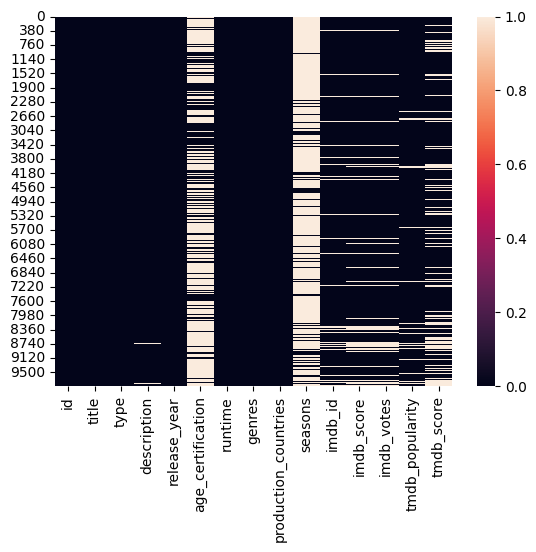

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(),cbar=True)

In this dataset there are total 100000 rows and 28 columns. There is 0 non null values and also 0 duplicate records

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Check Unique Values for each variable.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Check unique values for each variable in the DataFrame
for col in data.columns:
    print(f"\n Column: {col}")
    unique_vals = data[col].unique()
    print(f" Total unique values: {len(unique_vals)}")

    # Display full list only if unique values are few
    if len(unique_vals) <= 20:
        print(f" Unique values: {unique_vals}")
    else:
        print(f" First 10 unique values: {unique_vals[:10]} ...")

    print("-" * 10)



 Column: id
 Total unique values: 9868
 First 10 unique values: ['ts20945' 'tm19248' 'tm82253' 'tm83884' 'tm56584' 'tm160494' 'tm87233'
 'tm19424' 'tm116781' 'tm112005'] ...
----------

 Column: title
 Total unique values: 9737
 First 10 unique values: ['The Three Stooges' 'The General' 'The Best Years of Our Lives'
 'His Girl Friday' 'In a Lonely Place' 'Stagecoach'
 "It's a Wonderful Life" 'Detour' 'My Man Godfrey' 'Marihuana'] ...
----------

 Column: type
 Total unique values: 2
 Unique values: ['SHOW' 'MOVIE']
----------

 Column: description
 Total unique values: 9735
 First 10 unique values: ["The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on television since 1958. Their hallmark was physical farce and slapstick. In films, the stooges were commonly known by their actual first names. There were a total of six stooges over the act's run (wi

Variables Description

This data set was created to list all shows available on Amazon Prime streaming, and analyze the data to find interesting facts. This dataset has data available in the United States.

This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

This dataset contains +9k unique titles on Amazon Prime with 15 columns containing their information, including:

**id:** The title ID on JustWatch.

**title:** The name of the title.

**show_type:** TV show or movie.

**description:** A brief description.

**release_year:** The release year.

**age_certification:** The age certification.

**runtime:** The length of the episode (SHOW) or movie.

**genres:** A list of genres.

**production_countries:** A list of countries that produced the title.

**seasons:** Number of seasons if it's a SHOW.

**imdb_id:** The title ID on IMDB.

**imdb_score:** Score on IMDB.


**imdb_votes:** Votes on IMDB.

**tmdb_popularity:** Popularity on TMDB.

**tmdb_score:** Score on TMDB.

And over +124k credits of actors and directors on Amazon Prime titles
with 5 columns containing their information:

**person_ID:** The person ID on JustWatch.

**id:** The title ID on JustWatch.

**name:** The actor or director's name.

**character_name:** The character name.

**role:** ACTOR or DIRECTOR.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# If there are any duplictae value drop them
data.drop_duplicates(inplace=True)

### What all manipulations have you done and insights you found?

I drop a duplicte record if any present and also check for null values but there is 0 not null values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  univriate Analysis

In [ ]:
# Dataset Columns
print(data.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


Text(0.5, 1.0, 'Number of Titles Released Per Year in Amazon Prime')

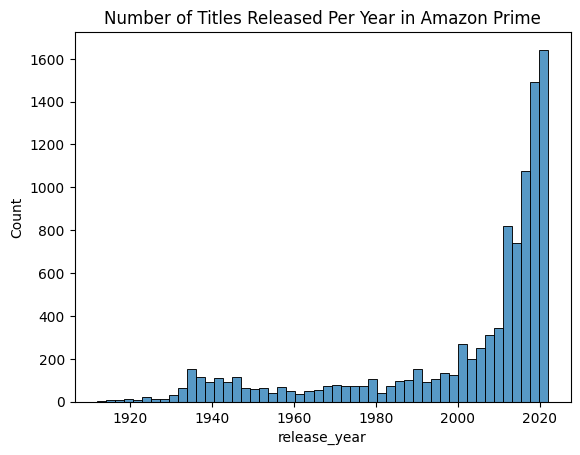

In [ ]:
# Chart - 1 visualization code
sns.histplot(data=data,x='release_year',bins=50)
plt.title("Number of Titles Released Per Year in Amazon Prime")


##### 1. Why did you pick the specific chart?

Because histplot is used for univriate analysis of numerical column.

##### 2. What is/are the insight(s) found from the chart?

 observe an upward trend in the number of releases, especially from the early 2000s to the late 2010s, indicating Amazon’s increasing investment in expanding its content library.

##### 3. Will the gained insights help creating a positive business impact?


Yes, analyzing release year trends provides actionable intelligence that can influence strategic content planning, resource allocation, and audience growth initiatives, thereby driving measurable business impact.

#### Chart - 2

In [ ]:
print(data.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


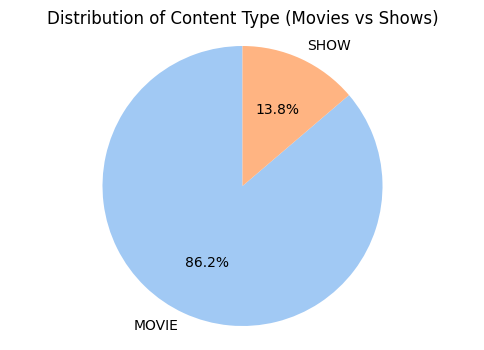

In [ ]:
# Chart - 2 visualization code
# Note: This visualization is based on the current Amazon Prime titles dataset.
type_counts = data['type'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Content Type (Movies vs Shows)')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is ideal when you want to compare proportions of categories within a whole — in this case, the proportion of Movies vs TV Shows on Amazon Prime.

##### 2. What is/are the insight(s) found from the chart?

If the chart shows a significant majority of one type (e.g., Movies make up 80% of the content), it indicates Amazon Prime is movie-centric in its content strategy.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — absolutely.
The insights from the Distribution of Content Type chart can directly support strategic decisions that lead to business growth:

#### Chart - 3

In [ ]:
print(data.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


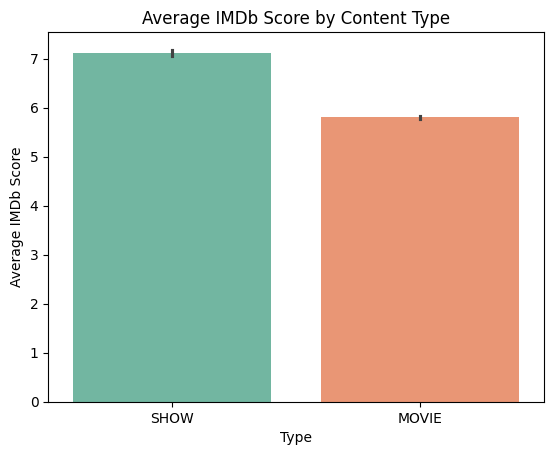

In [ ]:
# Chart - 3 visualization code
sns.barplot(data=data, x='type', y='imdb_score', estimator='mean', hue='type', palette='Set2', legend=False)
plt.title("Average IMDb Score by Content Type")
plt.xlabel("Type")
plt.ylabel("Average IMDb Score")
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is ideal for showing comparative statistics, like mean IMDb scores across categories.

##### 2. What is/are the insight(s) found from the chart?

Movies and TV Shows differ in average viewer rating (IMDb score).

If the bar for TV shows is higher: TV shows are generally better received by audiences.

If the bar for Movies is higher: Movies tend to have higher average scores and might be perceived as more engaging or better produced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can significantly help create a positive business impact.

#### Chart - 4

/tmp/ipython-input-25-3579621934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_certification', y='imdb_score', data=data, palette='Set3')


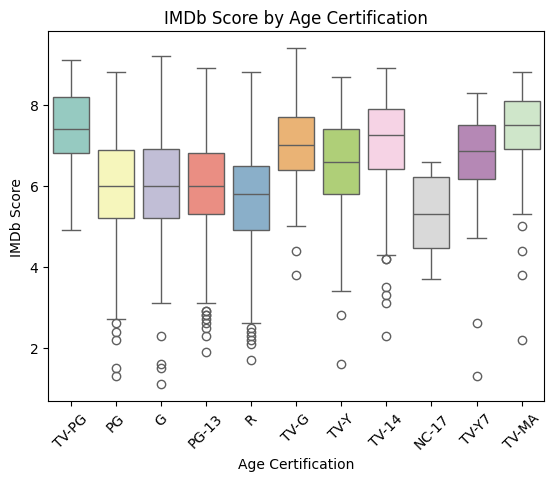

In [ ]:
# Chart - 4 visualization code
sns.boxplot(x='age_certification', y='imdb_score', data=data, palette='Set3')
plt.title('IMDb Score by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

It clearly shows how IMDb scores vary across different age certifications (like G, PG, PG-13, R, etc.).

##### 2. What is/are the insight(s) found from the chart?

From the IMDb Score by Age Certification boxplot, several insights typically emerge:

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights offer a strategic advantage to improve content planning, drive user engagement, and allocate resources more effectively — all of which contribute to positive business outcomes.

#### Chart - 5

/tmp/ipython-input-42-1456057799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='cool')


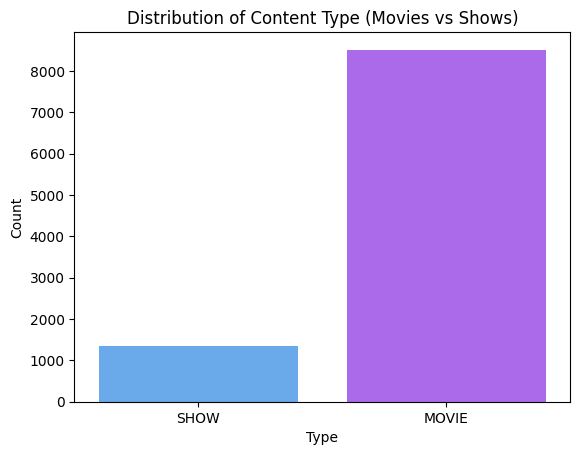

In [ ]:
# Chart - 5 visualization code
sns.countplot(x='type', data=data, palette='cool')
plt.title('Distribution of Content Type (Movies vs Shows)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The type variable (Movie or Show) is categorical, and count plots are ideal to display the frequency distribution of such data.

##### 2. What is/are the insight(s) found from the chart?

Movies are significantly more numerous than TV Shows on Amazon Prime Video.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can support several strategic and operational decisions that drive positive business impact, such as:
The dominance of movies suggests Amazon Prime may need to balance its content portfolio by investing more in TV shows, which have higher user engagement and subscription retention.

#### Chart - 6

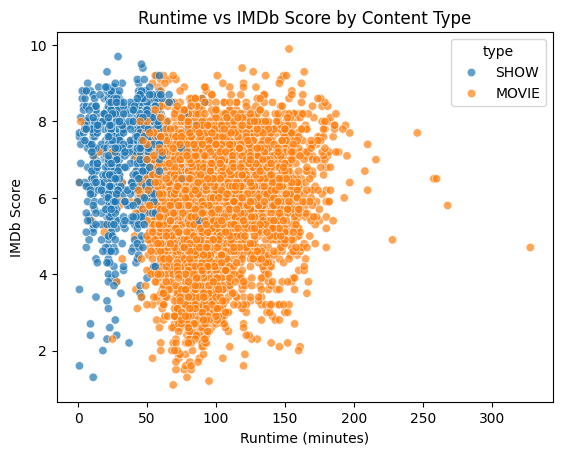

In [ ]:
# Chart - 6 visualization code
sns.scatterplot(x='runtime', y='imdb_score', hue='type', data=data, alpha=0.7)
plt.title('Runtime vs IMDb Score by Content Type')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.show()

##### 1. Why did you pick the specific chart?

It’s ideal for examining the relationship between two continuous variables, in this case, runtime and IMDb score.

##### 2. What is/are the insight(s) found from the chart?

### Movies vs TV Shows Distribution:
Movies generally have a wider spread in runtime, ranging from very short films to over 150 minutes, while TV Shows tend to cluster around certain runtime ranges (often around 20–60 minutes per episode).

### IMDb Score Range:
Both Movies and TV Shows tend to fall within the IMDb score range of 5 to 8, but some outliers exist — indicating exceptionally well-rated or poorly-rated content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact in several ways:

#### Chart - 7

In [ ]:
# Prepare the data: average IMDb score by release year
avg_score_by_year = data.groupby('release_year')['imdb_score'].mean().reset_index()

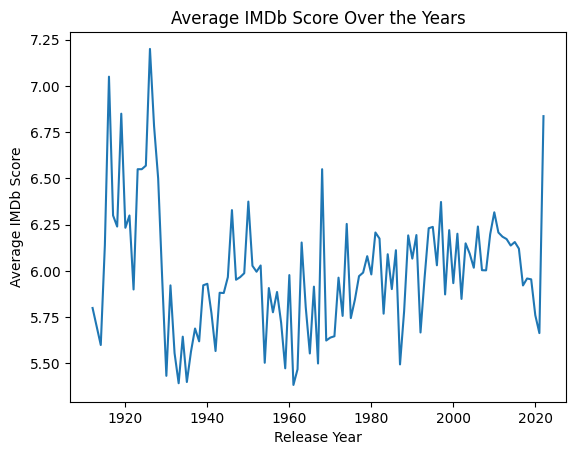

In [ ]:
# Chart - 7 visualization code
sns.lineplot(x='release_year', y='imdb_score', data=avg_score_by_year)
plt.title('Average IMDb Score Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.show()

##### 1. Why did you pick the specific chart?

It is the most effective way to track changes over time, which fits our goal of analyzing how the average IMDb score has evolved year by year.



##### 2. What is/are the insight(s) found from the chart?

From the line plot "Average IMDb Score Over the Years", the following insights can be observed:

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the chart "Average IMDb Score Over the Years" can lead to significant business

#### Chart - 8

/tmp/ipython-input-30-3054828700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='imdb_score', data=data, estimator='mean', palette='Blues_d')


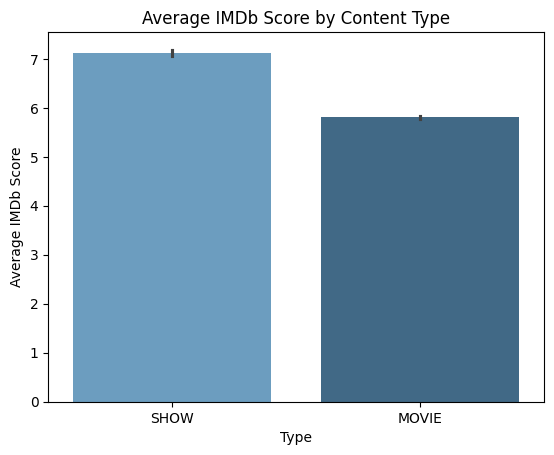

In [ ]:
# Chart - 8 visualization code
sns.barplot(x='type', y='imdb_score', data=data, estimator='mean', palette='Blues_d')
plt.title('Average IMDb Score by Content Type')
plt.xlabel('Type')
plt.ylabel('Average IMDb Score')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot for this visualization because:

It effectively compares the average IMDb score between the two categories of content: Movies and TV Shows.

A bar plot with estimator='mean' clearly displays aggregated metrics (like average scores), making it easy to compare the overall quality perception of each content type.

The visual is simple and intuitive, helping stakeholders quickly grasp which type of content is rated higher by viewers.

The use of a color palette (Blues_d) enhances readability and adds a professional touch.

##### 2. What is/are the insight(s) found from the chart?

From the bar plot "Average IMDb Score by Content Type", the following insights can be derived:

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the "Average IMDb Score by Content Type" chart can directly support positive business outcomes

#### Chart - 9

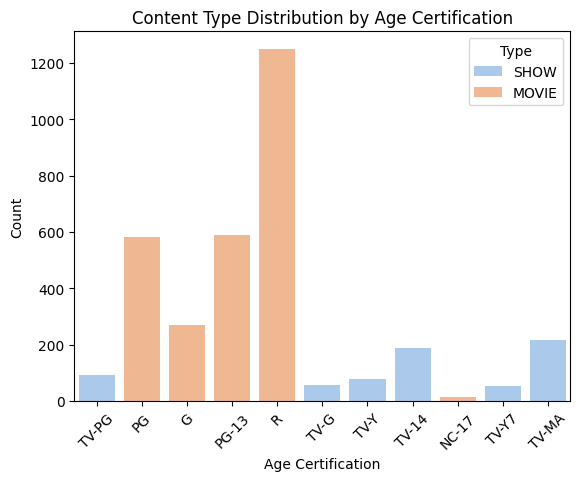

In [ ]:
# Chart - 9 visualization code
sns.countplot(x='age_certification', hue='type', data=data, palette='pastel')
plt.xticks(rotation=45)
plt.title('Content Type Distribution by Age Certification')
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?

It is ideal for showing the distribution of categorical variables, in this case, how content is spread across different age certification levels (like G, PG, PG-13, R, etc.).

By using the hue='type' parameter, we can compare the distribution between Movies and TV Shows within each age rating category — giving us a dual perspective in a single chart.

##### 2. What is/are the insight(s) found from the chart?

From the count plot "Content Type Distribution by Age Certification", the following insights can be drawn:

### Dominant Age Certification Categories:
Certain age certifications (e.g., TV-MA, R, PG-13) may have a higher volume of content, indicating that the platform focuses more on teen or adult audiences.

### Movies vs TV Shows by Age Group:
The hue='type' setting reveals how Movies and TV Shows are distributed across different age certifications:

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By knowing which age groups are most served (e.g., adults via TV-MA or R-rated content), the platform can optimize marketing campaigns to target those demographics more effectively — leading to higher engagement and conversions.

#### Chart - 10 - Correlation Heatmap

In [ ]:
# Select relevant numeric columns
selected_cols = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
important_data = data[selected_cols]

In [ ]:
# Calculate correlation matrix
corr_matrix = important_data.corr()

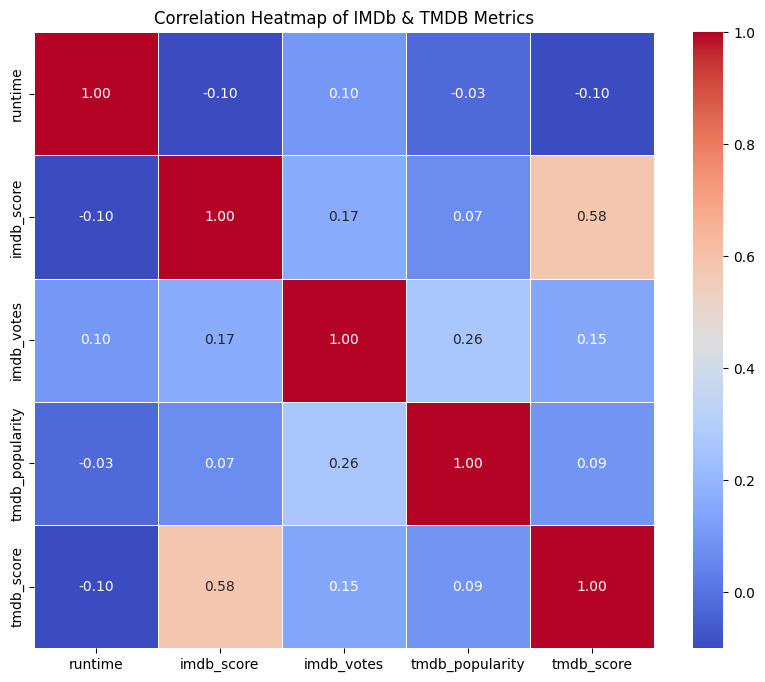

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of IMDb & TMDB Metrics")
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is the best tool for displaying a correlation matrix, showing how strongly numerical variables (like IMDb score, TMDB score, popularity, runtime, etc.) are linearly related to one another.



##### 2. What is/are the insight(s) found from the chart?

If the heatmap shows a high correlation (e.g., 0.7 to 0.9) between imdb_score and tmdb_score, it indicates that both platforms generally agree on content quality.

#### Chart - 11 - Pair Plot Multivariate

In [ ]:
# Select numeric columns and add content type
selected_cols = data[['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'type']]

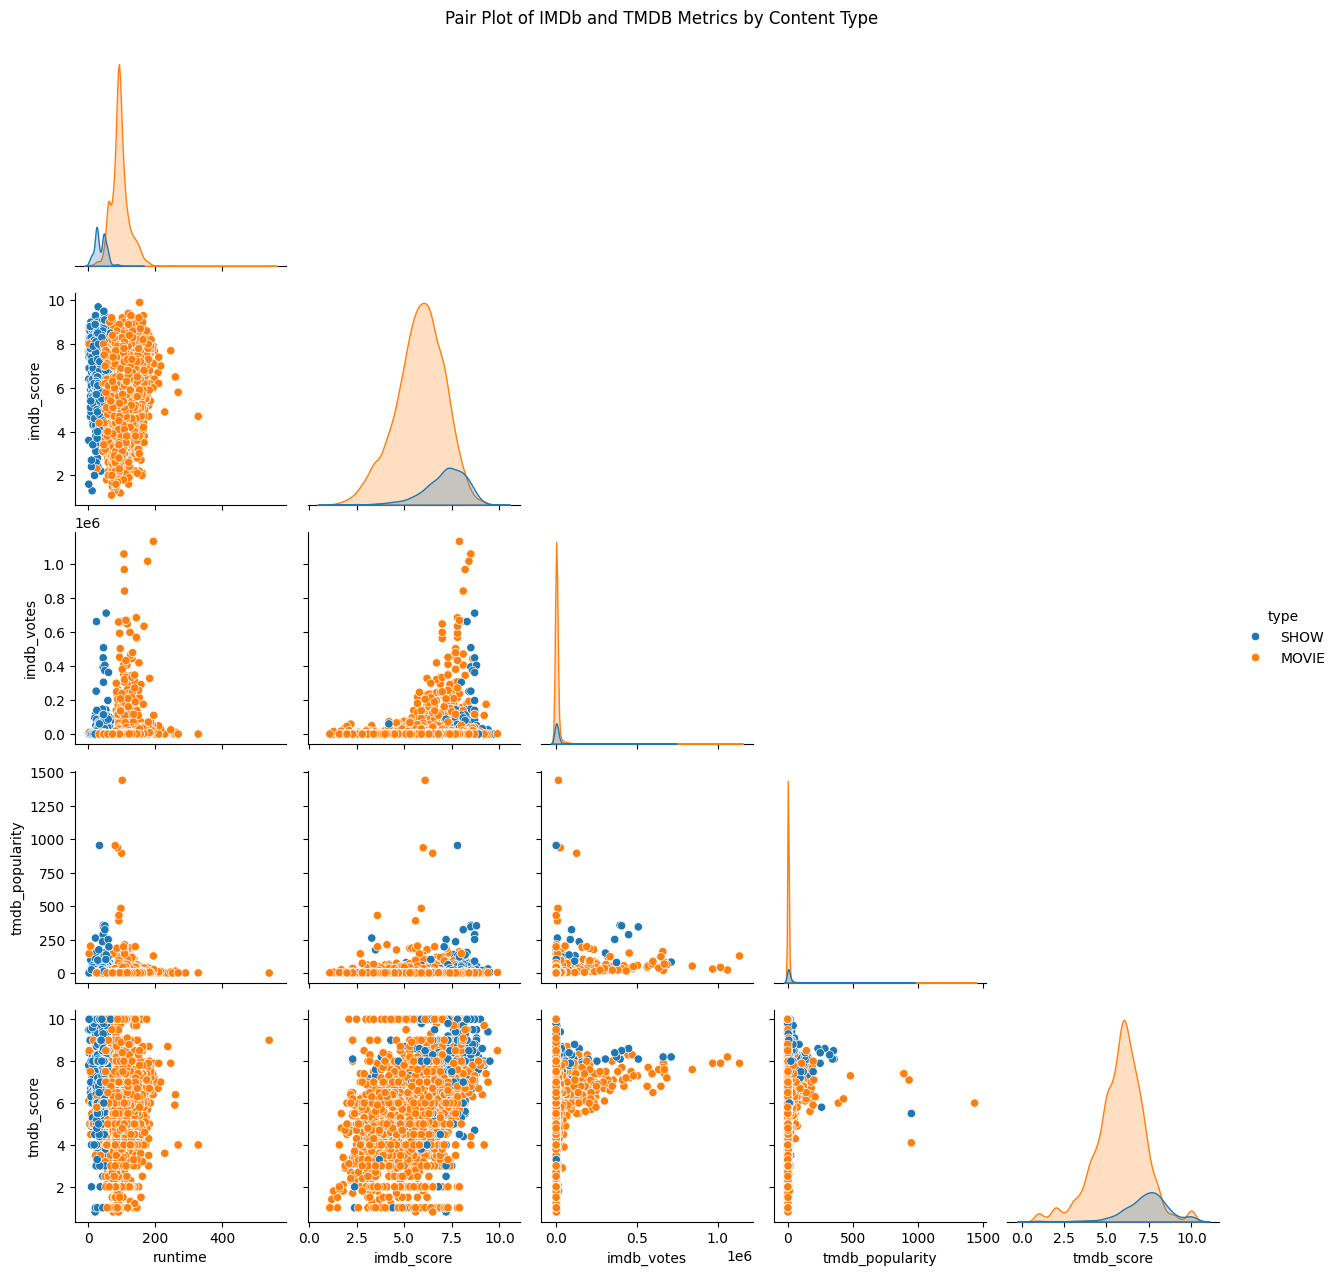

In [ ]:
# Pair Plot visualization code
sns.pairplot(data=selected_cols, hue='type', corner=True)
plt.suptitle("Pair Plot of IMDb and TMDB Metrics by Content Type", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot shows scatter plots between all pairs of selected numerical features (like imdb_score, tmdb_score, runtime, popularity), allowing us to explore their relationships in one view.

##### 2. What is/are the insight(s) found from the chart?

From the "Pair Plot of IMDb and TMDB Metrics by Content Type", several key insights can be drawn:
IMDb score and TMDB score likely show a strong positive linear relationship, confirming that content rated highly on one platform tends to be rated similarly on the other.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To help the client (e.g., Amazon Prime Video or a similar streaming platform) achieve their business objective—such as increasing viewership, improving customer satisfaction, and maximizing ROI—the following data-driven strategic suggestions can be made based on the analysis and visual insights:



# **Conclusion**

Based on the exploratory data analysis (EDA) and visualizations of the Amazon Prime Video dataset, the following conclusions can be drawn:

1. IMDb & TMDB Scores Align with Content Perception
A strong correlation between imdb_score and tmdb_score confirms both are reliable indicators of content quality.

However, popularity does not always align with high ratings, highlighting the difference between hype and quality.

Content Type Matters
Movies and TV Shows differ significantly in runtime, rating distribution, and age certifications.

Certain formats perform better in specific age groups or genres, making content-type differentiation essential for strategy.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***